In [1]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.plts import plot_lines, plot_dots

/Users/tom/Code/Projects/APMethods/AperiodicMethods/apm/plts/data.py:7: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof.utils import trim_spectrum


In [53]:
import numpy as np
from neurodsp.sim import sim_synaptic_kernel, sim_synaptic_current
from neurodsp.spectral import compute_spectrum
from neurodsp.plts.spectral import plot_power_spectra

In [54]:
from fooof import FOOOF
from fooof.utils.params import compute_knee_frequency

In [20]:
fs = 2000.
t_sim = 2.
t_ker = np.arange(0,t_sim,1/fs)
t_r = 0
t_ds = np.arange(0.005,0.08,0.01)
f_to_plot=200

In [21]:
t_ds

array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075])

In [ ]:
upd_exp = lambda params, val : params.update({'exponent' : val})

In [65]:
# Set knee ranges - defined based on the `tau_d` parameter of synaptic current function
KNEES = np.arange(0.005, 0.08, 0.01)


# Update knee, based on setting the decay time constant
upd_knee = lambda params, val : params.update({'tau_d' : val})

In [66]:
KNEES

array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075])

In [73]:
N_SECONDS = 30
FS = 500

In [74]:
sigs = []
for tau_d in KNEES:
    sig = sim_synaptic_current(N_SECONDS, FS, tau_d=tau_d)
    sigs.append(sig)

In [75]:
powers = []
for sig in sigs:
    freqs, pows = compute_spectrum(sig, FS)
    powers.append(pows)

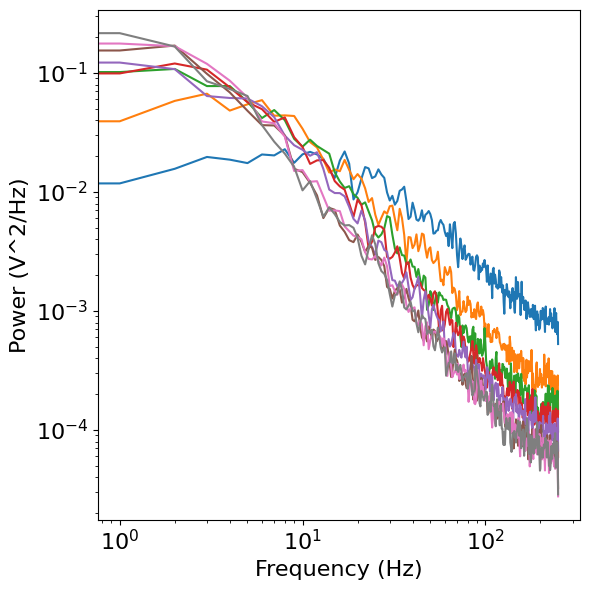

In [76]:
plot_power_spectra(freqs, powers)

In [62]:
fm = FOOOF(max_n_peaks=0, aperiodic_mode='knee', verbose=False)
fm.fit(freqs, powers3)
fm.get_params('aperiodic', 'knee')

1.2220091723137636

In [ ]:
fm.

In [10]:


kernels = []
# get synaptic kernels
for t_d in t_ds:
    ker = sim.sim_synaptic_kernel(t_sim, fs, tau_r=t_r, tau_d=t_d)
    kernels.append(ker/ker[0])

NameError: name 'sim' is not defined

In [ ]:
alphas = []
fm = FOOOF(verbose=False)
for ind, sig in enumerate(all_data):
    freqs, powers = compute_spectrum(sig, fs=fs, f_range=f_range)
    fm.fit(freqs, powers)
    alphas.append(np.max(fm.get_params('peak', 'PW')))

In [1]:
def save_figure(save_fig, file_name, file_path):
    """Save out a figure."""

    if save_fig:
        plt.tight_layout()
        file_name = file_name + SAVE_EXT

        if not os.path.isdir(os.path.join(APMDB().figs_path, file_path)):
            os.mkdir(os.path.join(APMDB().figs_path, file_path))

        plt.savefig(os.path.join(APMDB().figs_path, file_path, file_name))

In [2]:
def custom_psd_style(ax, **kwargs):
    """Define custom styling for the PSD plots."""

    ax.set_xticks([], minor=True)
    ax.set_yticks([], minor=True)

    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])

    plt.tight_layout()

In [1]:
def sampler(values, probs=None):
    """Create a generator to sample from a parameter range."""
        
    # Check that length of options is same as length of probs, if provided
    if np.any(probs):
        if len(inds) != len(probs):
            raise ValueError("The number of options must match the number of probabilities.")
    
    while True:
        yield np.random.choice(values, p=probs)
        

def stepper(start, stop, step):
    """Create a generator to step across a parameter range.
    
    Parameters
    ----------
    start
    
    
    """
    
    for val in np.arange(start, stop, step):
        yield(val)

        
# def sample_vals(sim_params, sampler, update):
#     """   """
#     while True:
#         val = next(sampler)
#         update(sim_params, val)
#         yield sim_params